In [1]:
import math

import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
%matplotlib inline
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 18
})

SAVE_FIG = False

def save_fig(name, tight_layout = True):
    if SAVE_FIG:
        print(f"Saving figure {name} ...")
        if tight_layout:
            plt.tight_layout()
        plt.savefig(f"plots/{name}.pdf", backend="pgf")

def add_ones(vector: np.ndarray):
    return np.c_[np.ones(vector.shape), vector]

In [2]:
rng = default_rng(42)

In [3]:
X = 6 * rng.random((100, 1)) - 3
y = 5 + 3 * X + 3 * rng.standard_normal((100, 1))

In [4]:
m, n = X.shape

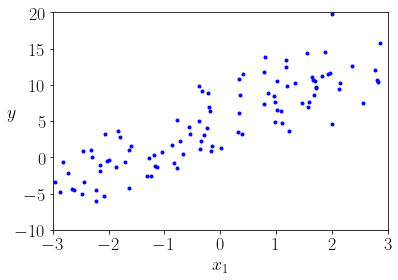

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, -10, 20])
plt.show()

# Linear regression using the Normal Equation

In [6]:
X_pad = add_ones(X)
theta_best = np.linalg.pinv(X_pad.T @ X_pad) @ X_pad.T @ y

In [7]:
theta_best

array([[4.96104356],
       [3.03831479]])

In [8]:
X_new = np.array([[-4], [4]])
X_new_pad = add_ones(X_new)
y_predict = X_new_pad @ theta_best
y_predict

array([[-7.19221561],
       [17.11430274]])

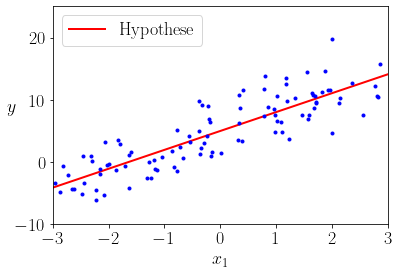

In [9]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Hypothese")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, -10, 25])
save_fig("data_points_line")
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) # Verwendet die Methode der kleinsten Quadrate
print(lin_reg.intercept_)
print(lin_reg.coef_)

[4.96104356]
[[3.03831479]]


In [11]:
lin_reg.predict(X_new)

array([[-7.19221561],
       [17.11430274]])

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_pad, y, rcond=1e-6)
theta_best_svd

array([[4.96104356],
       [3.03831479]])

In [13]:
np.linalg.pinv(X_pad) @ (y)

array([[4.96104356],
       [3.03831479]])

# Linear regression using batch gradient descent

In [14]:
def MSE(X: np.ndarray, y: np.ndarray, theta: np.ndarray):
    m = y.shape[0]
    square_sum = ((X @ theta - y) ** 2).sum()
    return 1/m * square_sum

In [15]:
def gradient_descent(X, y, alpha: int):
    n_iterations = 1000

    theta = np.zeros((n + 1, 1)) # initialize theta vector to zero

    for i in range(n_iterations):
        gradiants = 2/m * X.T @ (X @ theta - y)
        theta = theta - alpha * gradiants

    return theta

In [16]:
MSE(X_pad, y, np.array([[5], [3]]))

8.635457799234015

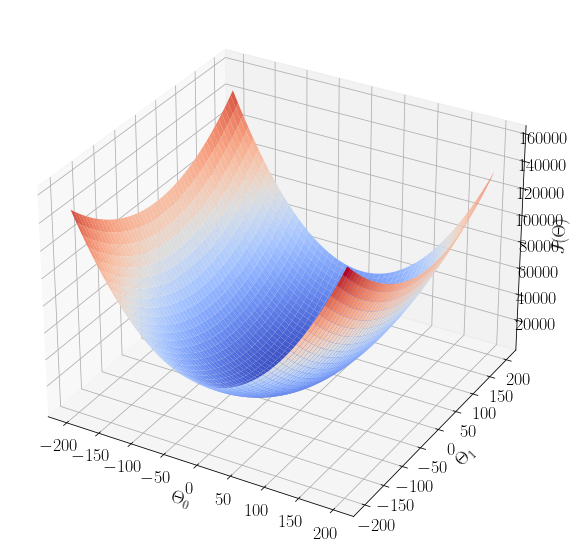

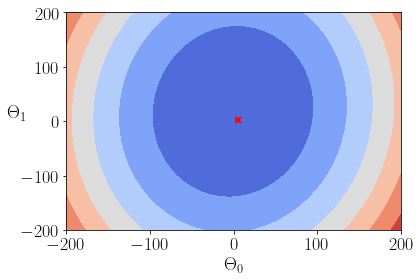

In [53]:
def plot_mse_function():
    theta_0 = np.linspace(-200, 200, 200)
    theta_1 = np.linspace(-200, 200, 200)

    xx, yy = np.meshgrid(theta_0, theta_1)

    errors = []
    for th0 in theta_0:
        for th1 in theta_1:
            mse = MSE(X_pad, y, np.array([[th0], [th1]]))
            errors.append(mse)

    errors = np.array(errors).reshape(xx.shape)

    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(projection="3d")
    ax.set_xlabel("$\Theta_0$")
    ax.set_ylabel("$\Theta_1$")
    ax.set_zlabel("$J(\Theta)$")
    ax.plot_surface(xx, yy, errors, cmap=cm.coolwarm)
    save_fig("mse_3d_plot")

    fig = plt.figure()
    ax = fig.add_subplot()
    # ax.axis([-200, 200, -300, 300])
    ax.set_xlabel("$\Theta_0$")
    ax.set_ylabel("$\Theta_1$", rotation=0)
    ax.contourf(xx, yy, errors, cmap=cm.coolwarm)
    ax.plot(5, 3, "rx", markeredgewidth=2)
    save_fig("mse_contour_plot")

    plt.show()

plot_mse_function()

In [18]:
def plot_gradient_descent(alpha: int):
    theta = np.zeros((n + 1, 1))

    theta_history = [theta]
    cost_history = []

    n_iterations = 30
    for i in range(n_iterations):
        if i < 10:
            y_predict = X_new_pad.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradiants = 2/m * X_pad.T @ (X_pad @ theta - y)
        theta = theta - alpha * gradiants
        theta_history.append(theta)
        cost_history.append([i, MSE(X_pad, y, theta)])

    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([-3, 3, -10, 25])
    plt.title(r"$\alpha = {}$".format(alpha))

    return theta_history, cost_history

In [19]:
theta = gradient_descent(X_pad, y, 0.2)
print(theta)

[[4.96104356]
 [3.03831479]]


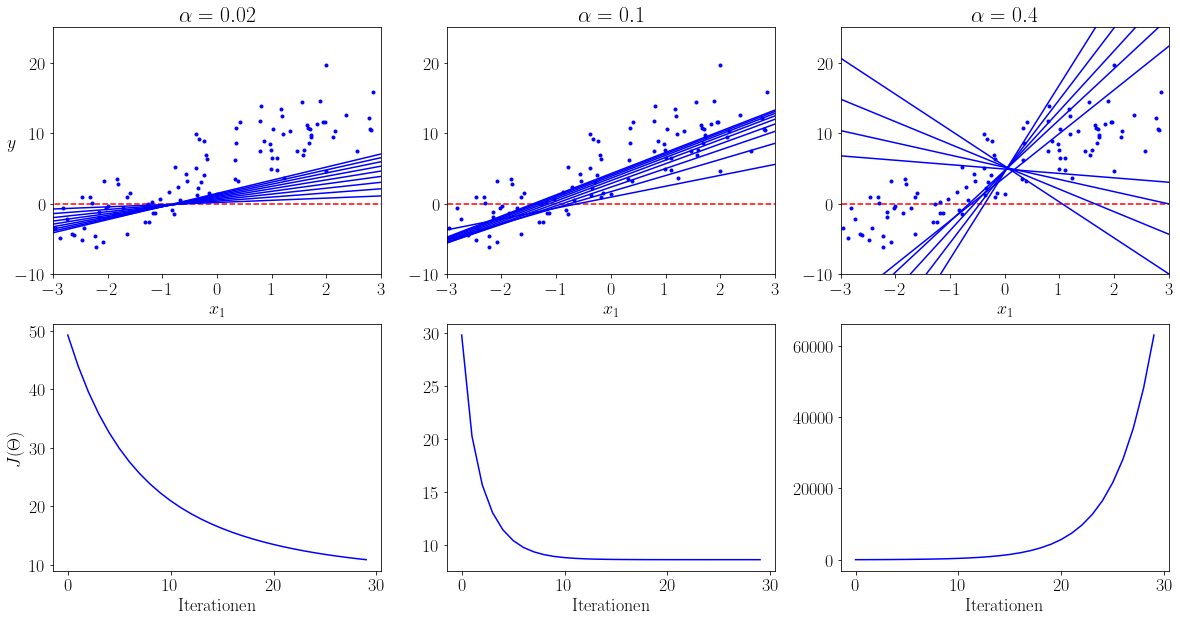

In [20]:
plt.figure(figsize=(20,10))

plt.subplot(231)
_, cost_history = plot_gradient_descent(0.02)
plt.ylabel("$y$", rotation=0)
cost_history = np.array(cost_history)

plt.subplot(234)
plt.plot(cost_history[:,0], cost_history[:,1], "b-")
plt.xlabel("Iterationen")
plt.ylabel(r"$J(\Theta)$")

plt.subplot(232)
theta_history_bgd, cost_history = plot_gradient_descent(0.1)
cost_history = np.array(cost_history)


plt.subplot(235)
plt.plot(cost_history[:,0], cost_history[:,1], "b-")
plt.xlabel("Iterationen")

plt.subplot(233)
_, cost_history = plot_gradient_descent(0.4)
cost_history = np.array(cost_history)

plt.subplot(236)
plt.plot(cost_history[:,0], cost_history[:,1], "b-")
plt.xlabel("Iterationen")
save_fig("gd_alpha_comparison")
plt.show()

# Stochastic Gradient Descent

In [21]:
def stochastic_gradient_desenct(X: np.ndarray, y: np.ndarray, t0 = 50, t1 = 5):
    n_epochs = 50

    theta = np.ones((n + 1, 1))

    def learning_schedule(t):
        return t0 / (t + t1)

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = rng.integers(0, m)
            xi = X[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]
            gradients = 2 * xi.T @ (xi @ theta - yi)
            alpha = learning_schedule(epoch * m + i)
            theta = theta - alpha * gradients
    
    return theta

In [22]:
def plot_stochastic_gradient_desenct(t0 = 50, t1 = 5):
    n_epochs = 20

    theta = np.zeros((n + 1, 1))
    theta_history_sgd = [theta]

    def learning_schedule(t):
        return t0 / (t + t1)

    for epoch in range(n_epochs):
        for i in range(m):
            if epoch == 0 and i == 0:
                y_predict = X_new_pad @ theta
                plt.plot(X_new, y_predict, "r--")
            if epoch == 12 and i < 20:
                y_predict = X_new_pad @ theta
                plt.plot(X_new, y_predict, "b-")
            random_index = rng.integers(0, m)
            xi = X_pad[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]
            gradients = 2 * xi.T @ (xi @ theta - yi)
            alpha = learning_schedule(epoch * m + i)
            theta = theta - alpha * gradients
            theta_history_sgd.append(theta)
    
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([-3, 3, -10, 25])
    save_fig("sgd")
    plt.show()

    return theta_history_sgd

In [23]:
theta = stochastic_gradient_desenct(X_pad, y)
print(theta)

[[5.24677714]
 [2.73766319]]


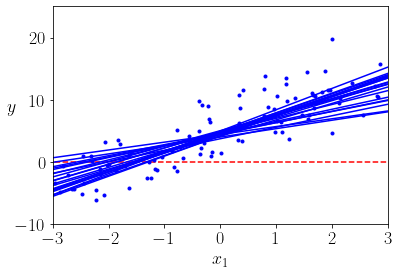

In [24]:
theta_history_sgd = plot_stochastic_gradient_desenct()

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.flat)

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [26]:
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[4.94302681]
[2.91496793]


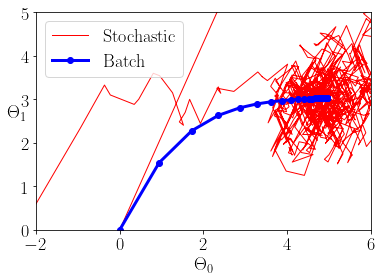

In [27]:
theta_history_bgd = np.array(theta_history_bgd)
theta_history_sgd = np.array(theta_history_sgd)
fig = plt.figure(figsize=[6,4])
plt.plot(theta_history_sgd[:,0], theta_history_sgd[:,1], "r-", linewidth=1, label="Stochastic")
plt.plot(theta_history_bgd[:,0], theta_history_bgd[:,1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left")
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$", rotation=0)
plt.axis([-2, 6, 0, 5])
save_fig("batch_stochastic")
plt.show()

# Polynomial Regression

In [28]:
X = 6 * rng.random((100, 1)) - 3
# 5 + 2x + 4x^2 + noise
y = 5 + 2 * X + 4 * (X ** 2) + 5 * rng.standard_normal((100, 1))

In [29]:
m, n = X.shape

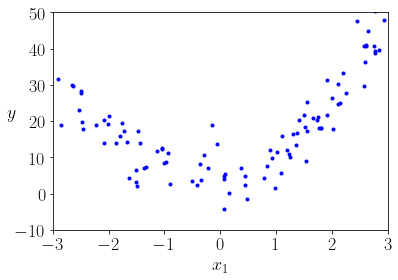

In [30]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, -10, 50])
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(include_bias=False)
X_poly = poly_feature.fit_transform(X)
X_poly = np.c_[X, X ** 2] # add manually

In [32]:
print(X[0])
print(X_poly[0])

[0.44433303]
[0.44433303 0.19743185]


In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_)
print(lin_reg.coef_) # 4.79 + 1.82x + 4.11x^2

[4.73966874]
[[2.28537863 4.07525911]]


In [34]:
X_new = np.linspace(-3, 3, 500).reshape(-1, 1)
X_new_poly = poly_feature.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)

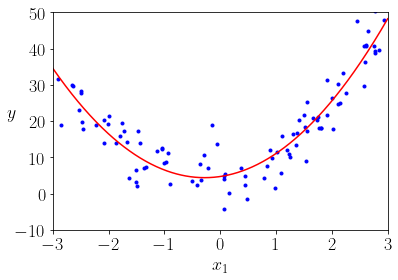

In [35]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, -10, 50])
save_fig("quadratic_predictions_plot")
plt.show()

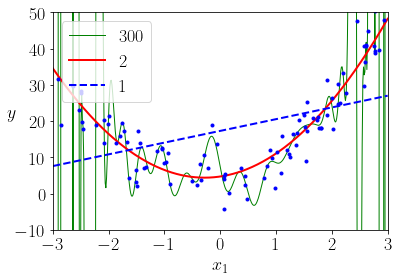

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("r-", 2, 2), ("b--", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, -10, 50])
save_fig("high_degree_polynomials_plot")
plt.show()

## Plotting Learning Curves

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), "r-|", linewidth=2, label="Train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Test")
    plt.legend(loc="upper right")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

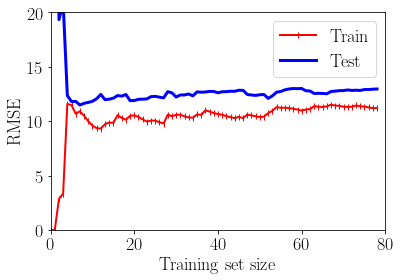

In [38]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 20])
save_fig("underfitting_learning_curves_plot")
plt.show()

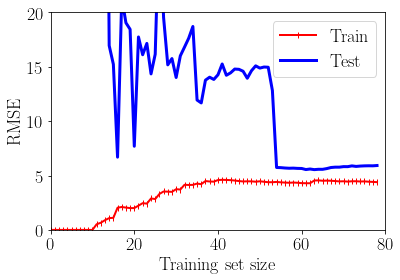

In [39]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 20])
save_fig("overfitting_learning_curves_plot")
plt.show()

# Regularized Linear Models

# Logistic regression

## Sigmoid function

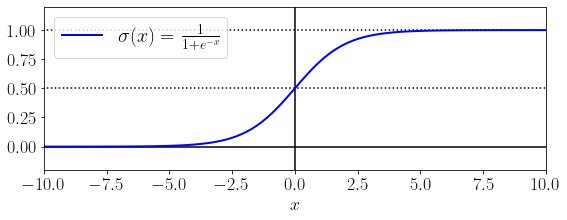

In [40]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-11, 11], [0, 0], "k-")
plt.plot([-11, 11], [0.5, 0.5], "k:")
plt.plot([-11, 11], [1, 1], "k:")
plt.plot([0, 0], [-2, 2], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
plt.xlabel("$x$")
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.2, 1.2])  
save_fig("logistic_function_plot")
plt.show()

In [41]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [42]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [43]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [44]:
print(iris.data[:, (1,3)])

[[3.5 0.2]
 [3.  0.2]
 [3.2 0.2]
 [3.1 0.2]
 [3.6 0.2]
 [3.9 0.4]
 [3.4 0.3]
 [3.4 0.2]
 [2.9 0.2]
 [3.1 0.1]
 [3.7 0.2]
 [3.4 0.2]
 [3.  0.1]
 [3.  0.1]
 [4.  0.2]
 [4.4 0.4]
 [3.9 0.4]
 [3.5 0.3]
 [3.8 0.3]
 [3.8 0.3]
 [3.4 0.2]
 [3.7 0.4]
 [3.6 0.2]
 [3.3 0.5]
 [3.4 0.2]
 [3.  0.2]
 [3.4 0.4]
 [3.5 0.2]
 [3.4 0.2]
 [3.2 0.2]
 [3.1 0.2]
 [3.4 0.4]
 [4.1 0.1]
 [4.2 0.2]
 [3.1 0.2]
 [3.2 0.2]
 [3.5 0.2]
 [3.6 0.1]
 [3.  0.2]
 [3.4 0.2]
 [3.5 0.3]
 [2.3 0.3]
 [3.2 0.2]
 [3.5 0.6]
 [3.8 0.4]
 [3.  0.3]
 [3.8 0.2]
 [3.2 0.2]
 [3.7 0.2]
 [3.3 0.2]
 [3.2 1.4]
 [3.2 1.5]
 [3.1 1.5]
 [2.3 1.3]
 [2.8 1.5]
 [2.8 1.3]
 [3.3 1.6]
 [2.4 1. ]
 [2.9 1.3]
 [2.7 1.4]
 [2.  1. ]
 [3.  1.5]
 [2.2 1. ]
 [2.9 1.4]
 [2.9 1.3]
 [3.1 1.4]
 [3.  1.5]
 [2.7 1. ]
 [2.2 1.5]
 [2.5 1.1]
 [3.2 1.8]
 [2.8 1.3]
 [2.5 1.5]
 [2.8 1.2]
 [2.9 1.3]
 [3.  1.4]
 [2.8 1.4]
 [3.  1.7]
 [2.9 1.5]
 [2.6 1. ]
 [2.4 1.1]
 [2.4 1. ]
 [2.7 1.2]
 [2.7 1.6]
 [3.  1.5]
 [3.4 1.6]
 [3.1 1.5]
 [2.3 1.3]
 [3.  1.3]
 [2.5 1.3]
 [2.6 1.2]

In [45]:
test = np.arange(100).reshape(-1, 10)
test

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [46]:
print(test[:, (0, 2, 4)])

[[ 0  2  4]
 [10 12 14]
 [20 22 24]
 [30 32 34]
 [40 42 44]
 [50 52 54]
 [60 62 64]
 [70 72 74]
 [80 82 84]
 [90 92 94]]
